In [130]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from math import sqrt
from numpy.linalg import eigh,eig
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [131]:
def zscore(m):
    return ((m.T-np.mean(m,axis=1))/np.std(m,axis=1)).T

def cov(matrix):
    return np.dot(matrix.T,matrix)/shape[0] 
    
def pca(matrix,shape): 
    values,vectors=eigh(matrix)
    vectors=np.asarray(vectors).T
    res = {values[i]: vectors[i] for i in range(len(values))}
    od=OrderedDict(sorted(res.items(),reverse=True))
    return od

def svd(matrix):
    mat1 = np.dot(matrix,matrix.T)
    #print(mat1)
    values,vectors=eigh(mat1)
    vectors=np.asarray(vectors).T
    #print(vectors)
    index=np.argsort(values)[::-1]
    U_sorted=np.asarray([vectors[i] for i in index])
    #print(U_sorted)

    mat2 = np.dot(matrix.T,matrix)
    values,vectors=eigh(mat2)
    vectors=np.asarray(vectors).T
    index=np.argsort(values)[::-1]
    V_sorted=np.asarray([vectors[i] for i in index])

    sigma=[]
    for i in index:
        if(values[i]>0):
            sigma.append(sqrt(values[i]))

    return U_sorted,np.asarray(sigma),V_sorted

def show_img(vector):
    img_data = vector.reshape((64,64))
    plt.imshow(img_data,cmap='gray')
    plt.show()

def find_alphas(data,base_faces):
    matrix=np.empty((len(data),len(base_faces)))
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            matrix[i,j]=np.dot(data[i].T,base_faces[j])
    return matrix

def plot_eigenfaces(base_faces,shape):
    plt.figure(figsize=(10,10))

    for i in range(len(base_faces)):
        plt.subplot(5,5,i+1)
        plt.imshow(base_faces[i].reshape(shape[1],shape[2]),cmap='gray')
    plt.show()

def reconstruction(alphas,base_faces):
  
    for i in range(len(base_faces)):
        if(i==0):
            temp=base_faces[i]*alphas[i]
        else:
            temp+=base_faces[i]*alphas[i] 
  
    show_img(temp)

In [132]:
olivetti = fetch_olivetti_faces()

data = olivetti.images
shape=data.shape
print(shape)

data=data.reshape(shape[0],shape[1]*shape[2])

data = zscore(data.reshape(shape[0],shape[1]*shape[2]))
matrix=cov(data)

base_faces_dict = pca(matrix,shape)

########## Using Library ###########

pca = PCA(n_components = 20)
temp=pca.fit(matrix)
base_faces_pca=pca.components_
print(pca.explained_variance_ratio_)

(400, 64, 64)
[9.1814286e-01 4.7983736e-02 1.1697351e-02 5.2762837e-03 4.2795590e-03
 2.5022735e-03 1.6833742e-03 1.5534867e-03 9.7549084e-04 7.4393547e-04
 6.9070759e-04 5.3808204e-04 4.3891132e-04 3.8042502e-04 3.3163259e-04
 2.7003960e-04 2.5408281e-04 1.8557640e-04 1.7997948e-04 1.6557658e-04]


(400, 4096)
(400, 20)


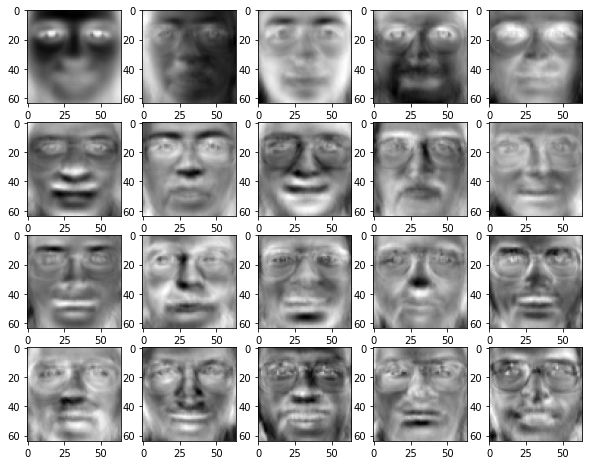

Enter face number 32

original image


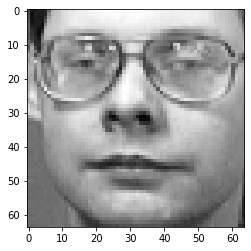

reconstructed image


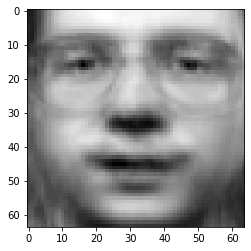

In [133]:
base_faces=[base_faces_dict[i] for i in base_faces_dict]
print(data.shape)
alphas = find_alphas(data,base_faces[:20])
print(alphas.shape)
plot_eigenfaces(base_faces[:20],shape)
number = int(input("Enter face number "))
print('\noriginal image')
show_img(data[number])
print('reconstructed image')
reconstruction(alphas[number],base_faces[:20])

(400, 64, 64)
Enter face number 32

original image


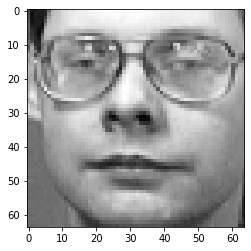

reconstructed image


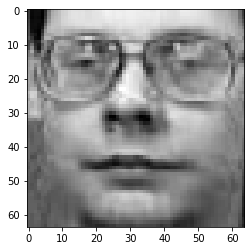

reconstructed image using library


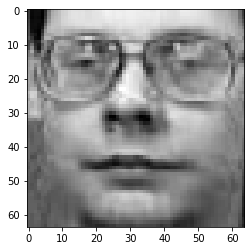

In [134]:
olivetti = fetch_olivetti_faces()

data = olivetti.images
shape=data.shape
print(shape)

data = zscore(data.reshape(shape[0],shape[1]*shape[2]))
data=data.reshape(shape)

number = int(input("Enter face number "))
print('\noriginal image')
show_img(data[number])

matrix = np.zeros(shape[1:])    
U,sigma,V = svd(data[number])
U_lib,sigma_lib,V_lib = np.linalg.svd(data[number])
U_lib=U_lib.T

for idx in range(len(U)):
    if (U[idx][0]<0 and U_lib[idx][0]>0) or (U[idx][0]>0 and U_lib[idx][0]<0):
        U[idx]=-U[idx]

for idx in range(len(V)):
    if (V[idx][0]<0 and V_lib[idx][0]>0) or (V[idx][0]>0 and V_lib[idx][0]<0):
        V[idx]=-V[idx]
        
U = U.T
matrix=np.matrix(U[:, :12]) * np.diag(sigma[:12]) * np.matrix(V[:12, :])
print('reconstructed image')
show_img(matrix)

############# using library ##############


U,sigma,V = np.linalg.svd(data[number])
reconstimg = np.matrix(U[:, :12]) * np.diag(sigma[:12]) * np.matrix(V[:12, :])
print('reconstructed image using library')
show_img(reconstimg)